In [1]:
import numpy as np
import matplotlib.pyplot as plt
import threading
import time

In [2]:
# Generate random dataset with one feature
np.random.seed(42)
X = np.random.rand(10000000) # Independent Variables
y = 2*X + 0.5*np.random.randn(10000000) # Dependent Variables

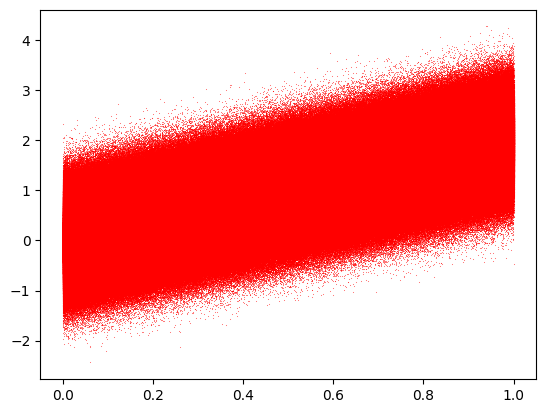

In [3]:
# Plot the data points
plt.plot(X, y, marker='x', linestyle='None', markersize=0.1, color='red')
plt.show()

In [4]:
# Set hyperparameters
learning_rate = 0.1
num_epochs = 100
num_threads = 4

In [5]:
# Initialize slope and intercept
m = 0
b = 0

In [6]:
# Define the loss function (mean squared error)
def mse_loss(y_pred, y_true):
    return np.mean((y_pred - y_true)**2)

In [7]:
# Define the gradient function
def gradient(X, y, m, b):
    N = X.shape[0]
    y_pred = m*X + b
    d_m = (2/N) * np.sum(X * (y_pred - y))
    d_b = (2/N) * np.sum(y_pred - y)
    return d_m, d_b

In [8]:
# Define the update function for each thread
def update_thread(X, y, learning_rate, num_epochs, thread_id, num_threads):
    global m, b
    for epoch in range(num_epochs):
        start_index = thread_id * (X.shape[0]//num_threads)
        end_index = (thread_id+1) * (X.shape[0]//num_threads)
        d_m, d_b = gradient(X[start_index:end_index], y[start_index:end_index], m, b)
        m -= learning_rate * d_m
        b -= learning_rate * d_b

In [9]:
# Run gradient descent without multithreading and measure execution time
start_time = time.time()
for epoch in range(num_epochs):
    d_m, d_b = gradient(X, y, m, b)
    m -= learning_rate * d_m
    b -= learning_rate * d_b
end_time = time.time()
print("Execution time without multithreading: ", round(end_time - start_time,5))

Execution time without multithreading:  24.3391


In [10]:
# Run gradient descent with multithreading and measure execution time
start_time = time.time()
threads = []
for i in range(num_threads):
    t = threading.Thread(target=update_thread, args=(X, y, learning_rate, num_epochs, i, num_threads))
    threads.append(t)
    t.start()
for t in threads:
    t.join()
end_time = time.time()
print("Execution time with multithreading: ", round(end_time - start_time,5))

Execution time with multithreading:  13.12581


In [11]:
# Print final slope and intercept
print("Final slope: ", round(m,5))
print("Final intercept: ", round(b,5))

Final slope:  1.99831
Final intercept:  0.00089


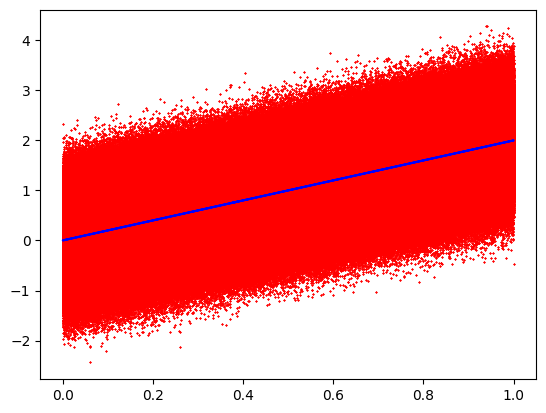

In [12]:
# Plot the linear regression line along with the data points
plt.plot(X, y, marker='x', linestyle='None', markersize=1, color='red')
plt.plot(X, m*X + b, color='blue')
plt.show()